# Data Analysis Overview

In this analysis file, we will leverage Python libraries such as `pandas`, `numpy`, `matplotlib`, and `seaborn` to derive insights from the processed data obtained in the data-cleansing file. The analysis will encompass:

1. **Basic Statistics:**
   - Compute descriptive statistics to gain an overview of the dataset's central tendencies and distributions.

2. **Time Series Analyses and Trends:**
   - Explore temporal patterns, trends, and seasonality in the data using time series analysis techniques.

3. **Operational Insights:**
   - Extract operational insights, such as peak activity periods, common routes, and other operational trends.

4. **Visualization and Reporting:**
   - Create visualizations using `matplotlib` and `seaborn` to effectively communicate findings. Generate reports summarizing key insights.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [29]:
from os import listdir

year = 2023

all_dfs = []
folder_path = f'../../assets/data/processed/{year}/'

# load all file from folder path
for file_name in listdir(folder_path):
    all_dfs.append(pd.read_excel(f'{folder_path}{file_name}'))

logistics_df = pd.concat(all_dfs, ignore_index=True)
logistics_df

,load_id,time_span_in_hours,destination_city,destination_state,origin_city,origin_state,comment,miles,shipper,truck_type,...,added_hour,added_minute,added_second,added_week,deleted_month,deleted_day,deleted_hour,deleted_minute,deleted_second,deleted_week
0,10711141,0.04,Ft Worth,TX,ABEILENE,TX,NO COMMENT,0,NO SHIPPER,F,...,12,7,52,48,11,28,12,10,27,48
1,10711143,0.06,Ft Worth,TX,ABEILENE,TX,NO COMMENT,0,NO SHIPPER,F,...,11,50,31,48,11,28,11,53,49,48
2,10711145,0.29,Ft Worth,TX,ABEILENE,TX,NO COMMENT,0,NO SHIPPER,F,...,12,10,26,48,11,28,12,27,53,48
3,10711151,0.14,Ft Worth,TX,ABEILENE,TX,NO COMMENT,0,NO SHIPPER,F,...,11,53,48,48,11,28,12,2,9,48
4,10711155,0.96,ORLA,TX,ABEILENE,TX,NO COMMENT,0,NO SHIPPER,F,...,10,40,12,48,11,29,11,37,34,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,10724771,0.08,SARASOTA,FL,ZWOLLE,LA,NO COMMENT,0,NO SHIPPER,F,...,8,9,6,50,12,12,8,13,45,50
11379,10726991,20.82,MARYLAND HE,MO,ZWOLLE,LA,NO COMMENT,0,NO SHIPPER,F,...,12,48,7,50,12,14,9,37,28,50
11380,30316024,1.11,LA VALLE,WI,ZWOLLE,LA,MUST TARP,1055,VFP,F,...,16,31,11,51,12,18,17,37,42,51
11381,30320680,2.24,COLFAX,WI,ZWOLLE,LA,MUST TARP,1151,VFP,F,...,9,49,55,52,12,27,12,4,35,52


### Basic Statistics and Time Series Trend Analysis

In this analysis, we will explore the average time a load stays in the system overall. Additionally, we will delve into time series trends, examining load duration patterns at a more granular level, such as weekly or monthly intervals. Visualization techniques will be employed to provide a clear representation of these insights. This combined approach aims to offer both a holistic understanding of load durations and nuanced insights into temporal trends.

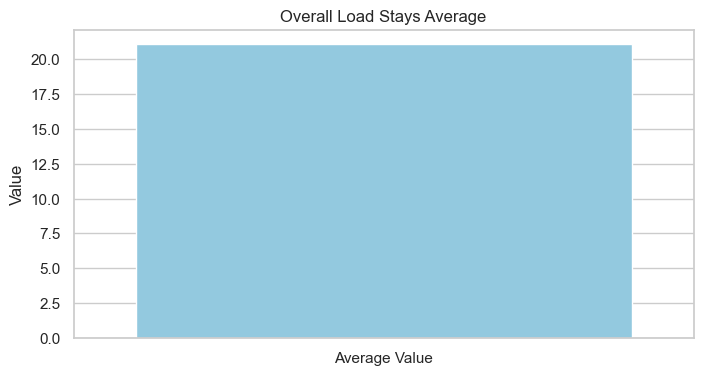

In [34]:
overall_load_stays_average = logistics_df.time_span_in_hours.mean()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
sns.barplot(x=['Average Value'], y=[overall_load_stays_average], color='skyblue')

plt.title('Overall Load Stays Average')
plt.ylabel('Value')
plt.show()

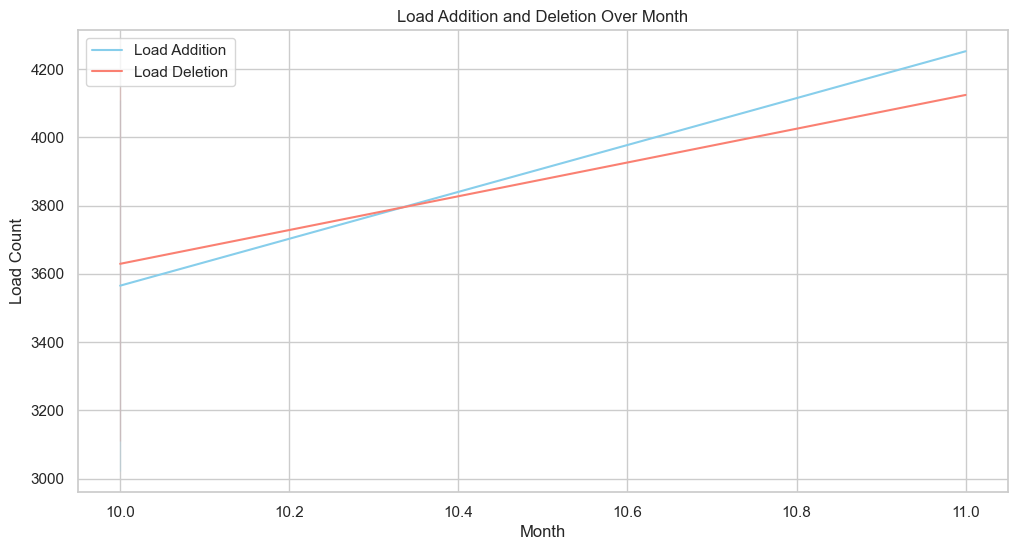

In [46]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x='added_month', y=logistics_df.groupby('added_month').size(
), data=logistics_df, color='skyblue', label='Load Addition',legend=True)
sns.lineplot(x='deleted_month', y=logistics_df.groupby('deleted_month').size(
), data=logistics_df, color='salmon', label='Load Deletion',legend=True)

plt.title('Load Addition and Deletion Over Month')
plt.xlabel('Month')
plt.ylabel('Load Count')
plt.legend()
plt.show()

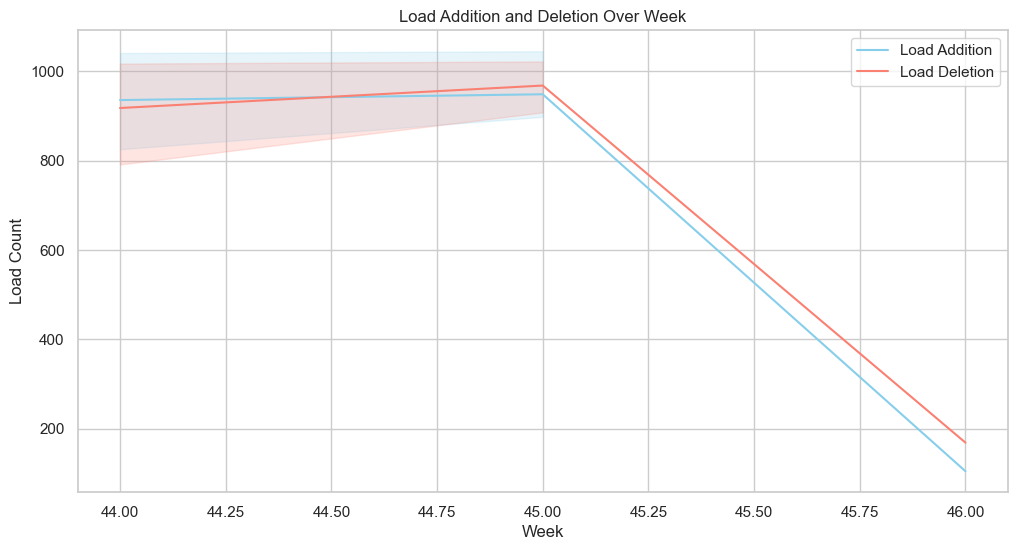

In [47]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x='added_week', y=logistics_df.groupby('added_week').size(
), data=logistics_df, color='skyblue', label='Load Addition',legend=True)
sns.lineplot(x='deleted_week', y=logistics_df.groupby('deleted_week').size(
), data=logistics_df, color='salmon', label='Load Deletion',legend=True)

plt.title('Load Addition and Deletion Over Weeks')
plt.xlabel('Week')
plt.ylabel('Load Count')
plt.legend()
plt.show()

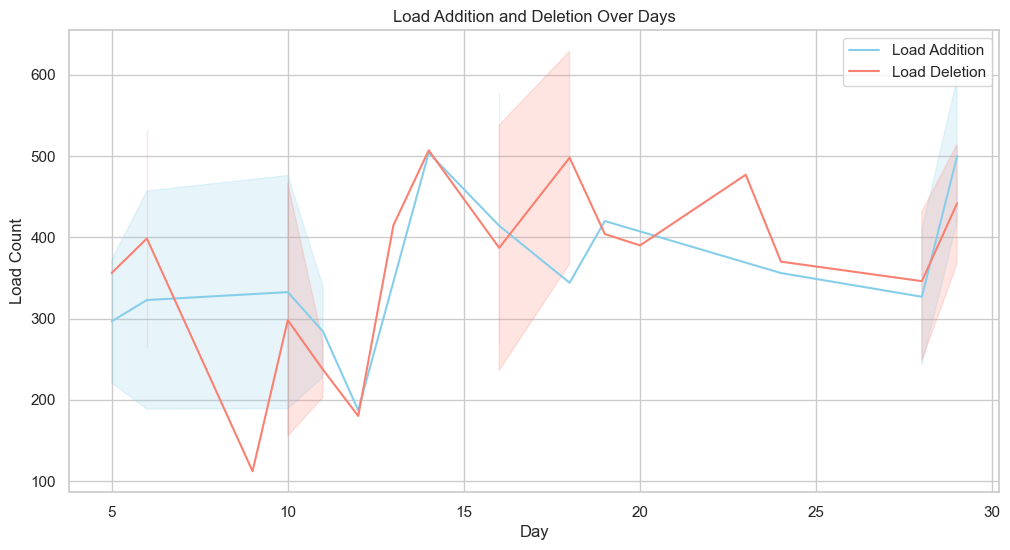

In [49]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x='added_day', y=logistics_df.groupby('added_day').size(
), data=logistics_df, color='skyblue', label='Load Addition',legend=True)
sns.lineplot(x='deleted_day', y=logistics_df.groupby('deleted_day').size(
), data=logistics_df, color='salmon', label='Load Deletion',legend=True)

plt.title('Load Addition and Deletion Over Days')
plt.xlabel('Day')
plt.ylabel('Load Count')
plt.legend()
plt.show()

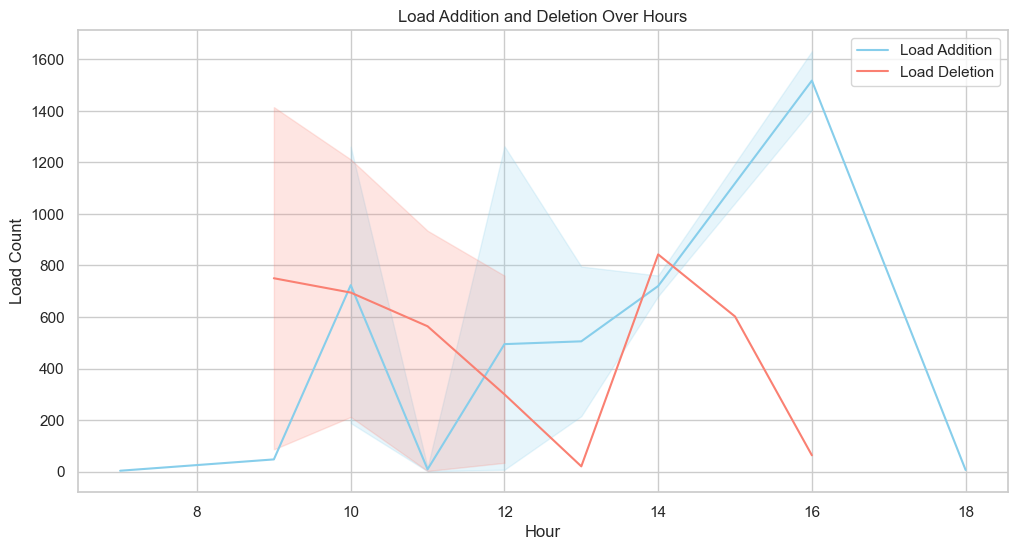

In [51]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x='added_hour', y=logistics_df.groupby('added_hour').size(
), data=logistics_df, color='skyblue', label='Load Addition',legend=True)
sns.lineplot(x='deleted_hour', y=logistics_df.groupby('deleted_hour').size(
), data=logistics_df, color='salmon', label='Load Deletion',legend=True)

plt.title('Load Addition and Deletion Over Hours')
plt.xlabel('Hour')
plt.ylabel('Load Count')
plt.legend()
plt.show()

### Operational Insights

In this analysis, we focus on two key operational insights:

1. **Peak Periods Identification:**
   - Utilizing time-based analysis, we identify peak periods for both load additions and deletions. Visualization through bar plots highlights the hours of the day with the highest load activity.

2. **Average Turnaround Time Assessment:**
   - Calculating the average turnaround time for loads provides insights into the typical duration a load stays in the system. This metric aids in understanding operational efficiency and performance.

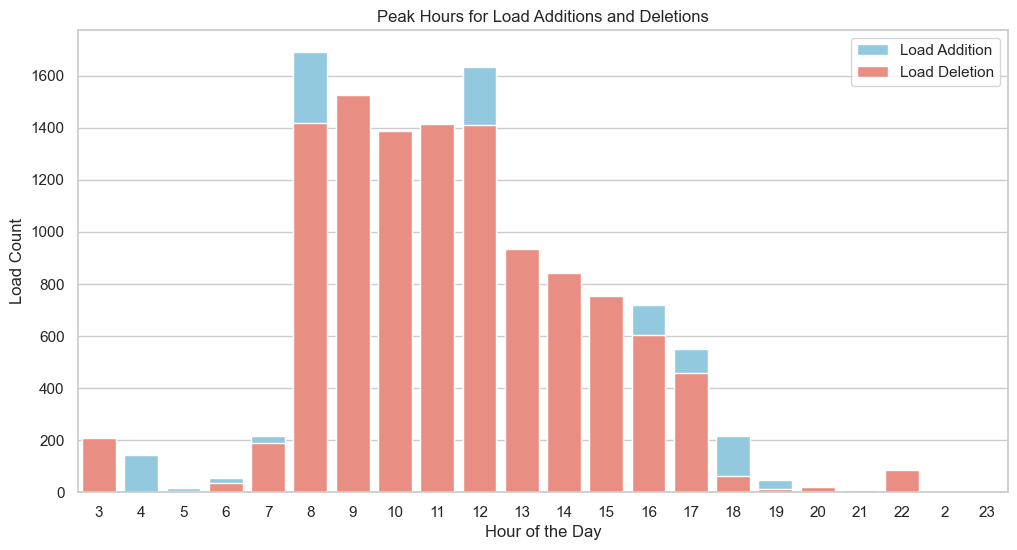

In [54]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='added_hour', data=logistics_df, color='skyblue', label='Load Addition')
sns.countplot(x='deleted_hour', data=logistics_df, color='salmon', label='Load Deletion')

plt.title('Peak Hours for Load Additions and Deletions')
plt.xlabel('Hour of the Day')
plt.ylabel('Load Count')
plt.legend()
plt.show()

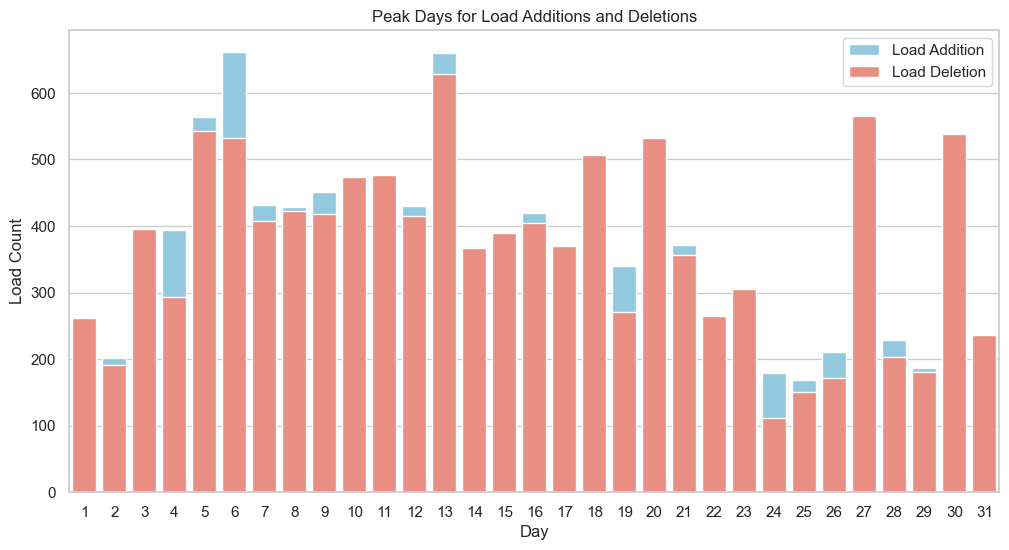

In [55]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='added_day', data=logistics_df, color='skyblue', label='Load Addition')
sns.countplot(x='deleted_day', data=logistics_df, color='salmon', label='Load Deletion')

plt.title('Peak Days for Load Additions and Deletions')
plt.xlabel('Day')
plt.ylabel('Load Count')
plt.legend()
plt.show()

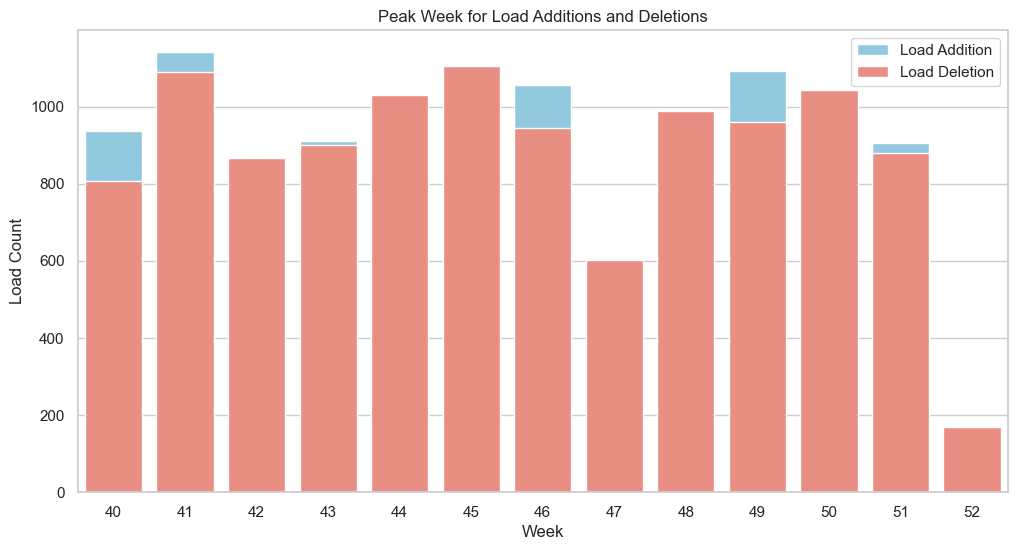

In [56]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='added_week', data=logistics_df, color='skyblue', label='Load Addition')
sns.countplot(x='deleted_week', data=logistics_df, color='salmon', label='Load Deletion')

plt.title('Peak Week for Load Additions and Deletions')
plt.xlabel('Week')
plt.ylabel('Load Count')
plt.legend()
plt.show()

In [59]:
average_turnaround_time = logistics_df.time_span_in_hours.mean()

df = pd.DataFrame(data={'average_turnaround_time_hours': [round(average_turnaround_time)]})
df

,average_turnaround_time_hours
0,21


### Visualization and Reporting

In this analysis, we leverage visualizations to succinctly convey key findings. Utilizing graphs and charts, we provide a clear and intuitive representation of the dataset's patterns and insights. This visual approach enhances the accessibility and interpretation of the data, facilitating effective communication of our analytical results.

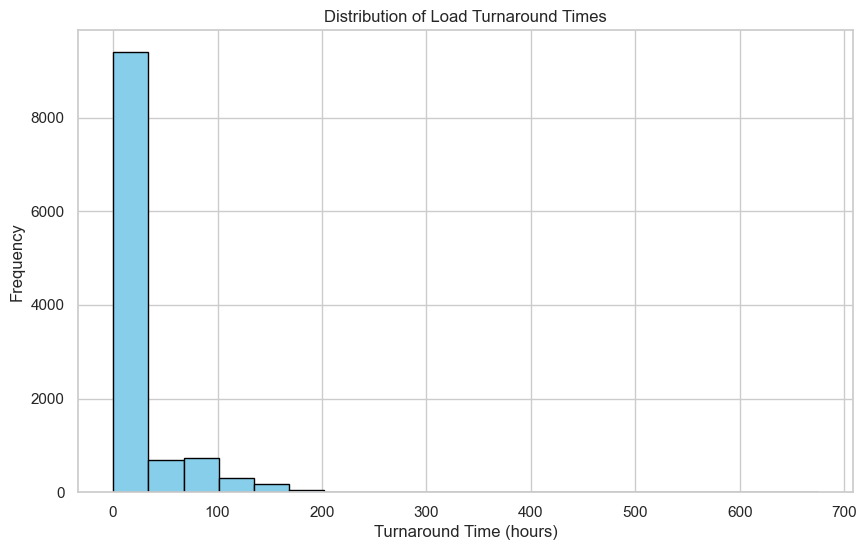

In [61]:
plt.figure(figsize=(10, 6))
plt.hist(logistics_df['time_span_in_hours'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Load Turnaround Times')
plt.xlabel('Turnaround Time (hours)')
plt.ylabel('Frequency')
plt.show()

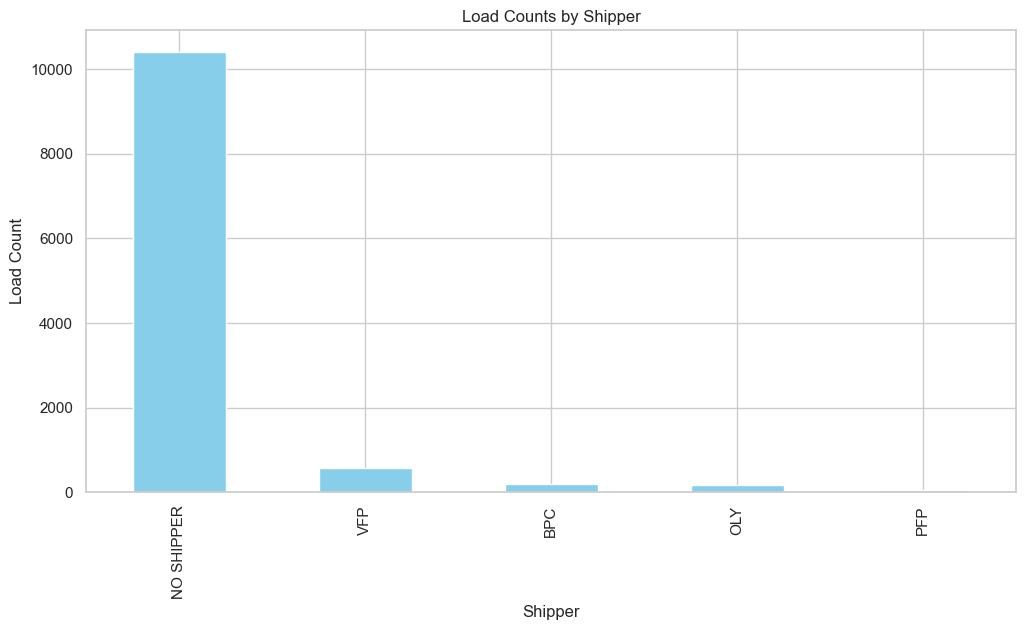

In [62]:
plt.figure(figsize=(12, 6))
logistics_df['shipper'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Load Counts by Shipper')
plt.xlabel('Shipper')
plt.ylabel('Load Count')
plt.show()

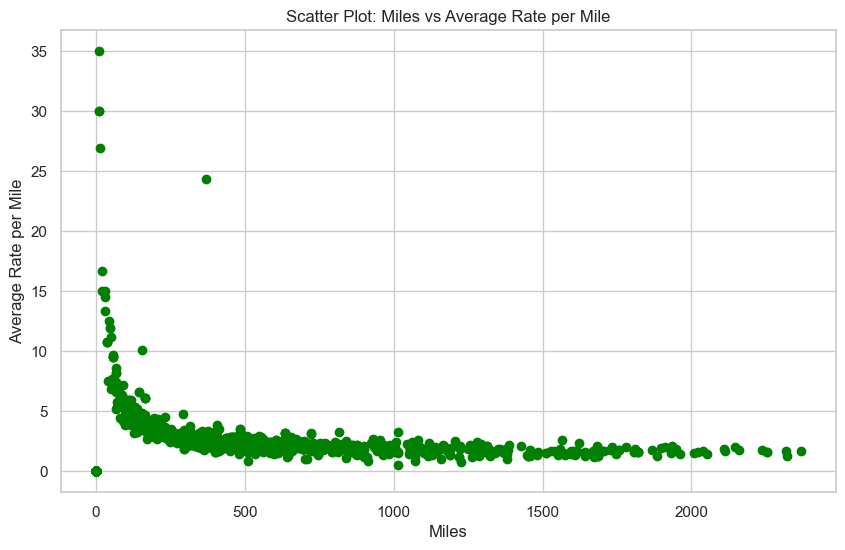

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(logistics_df['miles'], logistics_df['average_rate_per_mile'], color='green')
plt.title('Scatter Plot: Miles vs Average Rate per Mile')
plt.xlabel('Miles')
plt.ylabel('Average Rate per Mile')
plt.show()